In [7]:
import math
import scipy.integrate as integrate
import numpy as np

验证：阶乘比power增长更快

In [2]:
# 定义比较的值
z = 10.10
n_values = range(1, 21)

# 计算并打印阶乘和幂次的比较
print(f"{'n':>3} {'n!':>20} {'10.10^n':>20}")
for n in n_values:
    factorial = math.factorial(n)
    power = z**n
    print(f"{n:3} {factorial:20} {power:20.2f}")

  n                   n!              10.10^n
  1                    1                10.10
  2                    2               102.01
  3                    6              1030.30
  4                   24             10406.04
  5                  120            105101.01
  6                  720           1061520.15
  7                 5040          10721353.52
  8                40320         108285670.56
  9               362880        1093685272.68
 10              3628800       11046221254.11
 11             39916800      111566834666.53
 12            479001600     1126825030131.97
 13           6227020800    11380932804332.89
 14          87178291200   114947421323762.17
 15        1307674368000  1160968955369998.00
 16       20922789888000 11725786449236978.00
 17      355687428096000 118430443137293472.00
 18     6402373705728000 1196147475686664192.00
 19   121645100408832000 12081089504435306496.00
 20  2432902008176640000 122019003994796589056.00


### The Simple function

$$f(z) = \int^{\infty}_{0} \frac{e^{-zt}}{1+t} dt$$

The numerical calculation is:

In [9]:
def integrand(t, z):
    return np.exp(-z * t) / (1 + t)

z_values = [10, 10.10, 11, 12, 13, 100]

for z in z_values:
    result, error = integrate.quad(integrand, 0, np.inf, args=(z,))
    print(f"For z = {z}:")
    print(f"  Integral result: {result}")
    print(f"  Estimated error: {error}")
    print()

For z = 10:
  Integral result: 0.0915633339397882
  Estimated error: 1.1382248586936646e-09

For z = 10.1:
  Integral result: 0.09072741190001804
  Estimated error: 1.589725634718221e-09

For z = 11:
  Integral result: 0.08384177886034586
  Estimated error: 3.901342646412849e-09

For z = 12:
  Integral result: 0.07732613313891923
  Estimated error: 2.118045599449952e-09

For z = 13:
  Integral result: 0.07175353352446244
  Estimated error: 6.605236343166089e-11

For z = 100:
  Integral result: 0.009901942286733028
  Estimated error: 4.155578549798398e-12



### First divergent asymptotic expansion

$$\sum^{\infty}_{n = 0} (-1)^n \int^{\infty}_0 e^{-zt} t^n dt = \frac{1}{z} - \frac{1}{z^2} + \frac{2!}{z^3} - \frac{3!}{z^4} + ... $$

The numerical calculation:

In [32]:
def series_sum(z, num_terms):
    sum_value = 0
    for n in range(num_terms):
        term = (-1)**n * math.factorial(n) / z**(n + 1)
        sum_value += term
    return sum_value

z_values = [10, 10.10, 11, 12, 13, 100]
num_terms_list = [10, 10, 11, 12, 13, 100]  # choose appropriate term to truncate

for z in z_values:
    for num_terms in num_terms_list:
        approx_result = series_sum(z, num_terms)
        print(f"The result of the series sum for z = {z} with {num_terms} terms is: {approx_result}")

    print("-------------------------------------------------")


The result of the series sum for z = 10 with 10 terms is: 0.09154563200000002
The result of the series sum for z = 10 with 10 terms is: 0.09154563200000002
The result of the series sum for z = 10 with 11 terms is: 0.09158192000000001
The result of the series sum for z = 10 with 12 terms is: 0.09154200320000001
The result of the series sum for z = 10 with 13 terms is: 0.09158990336000002
The result of the series sum for z = 10 with 100 terms is: -8.4771431867839e+55
-------------------------------------------------
The result of the series sum for z = 10.1 with 10 terms is: 0.09071146619621775
The result of the series sum for z = 10.1 with 10 terms is: 0.09071146619621775
The result of the series sum for z = 10.1 with 11 terms is: 0.09074399199127904
The result of the series sum for z = 10.1 with 12 terms is: 0.09070856785804397
The result of the series sum for z = 10.1 with 13 terms is: 0.09075065593713513
The result of the series sum for z = 10.1 with 100 terms is: -3.131227080928874e

$$\frac{n!}{n^{n+1}} \sim \frac{\sqrt{2 \pi n} n^n e^{-n}}{n^{n+1}} = \sqrt{2\pi} n^{\frac{1}{2}} e^{-n} \approx \sqrt{2\pi} z^{\frac{1}{2}} e^{-z}$$

Results for z = 10:
  With 1 terms: 0.1, Error: 0.13978952727983707
  With 2 terms: 0.09000000000000001, Error: 0.14978952727983708
  With 3 terms: 0.09200000000000001, Error: 0.14778952727983707
  With 4 terms: 0.09140000000000001, Error: 0.14838952727983706
  With 5 terms: 0.09164000000000001, Error: 0.14814952727983705
  With 6 terms: 0.09152000000000002, Error: 0.14826952727983705
  With 7 terms: 0.09159200000000002, Error: 0.14819752727983704
  With 8 terms: 0.09154160000000001, Error: 0.14824792727983704
  With 9 terms: 0.09158192000000001, Error: 0.14820760727983706
  With 10 terms: 0.09154563200000002, Error: 0.14824389527983706
  With 11 terms: 0.09158192000000001, Error: 0.14820760727983706
  With 12 terms: 0.09154200320000001, Error: 0.14824752407983705
  With 13 terms: 0.09158990336000002, Error: 0.14819962391983704
  With 14 terms: 0.09152763315200002, Error: 0.14826189412783705
  With 15 terms: 0.09161481144320002, Error: 0.14817471583663705
  With 16 terms: 0.09148404400

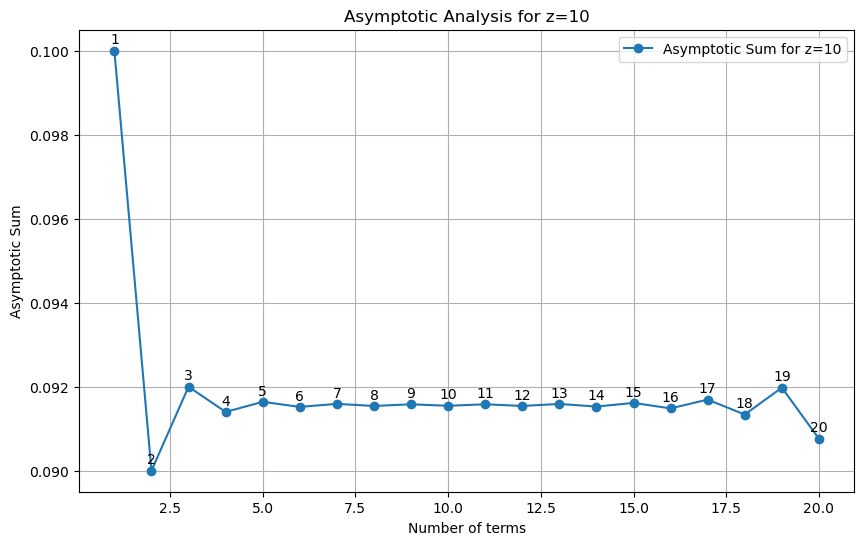

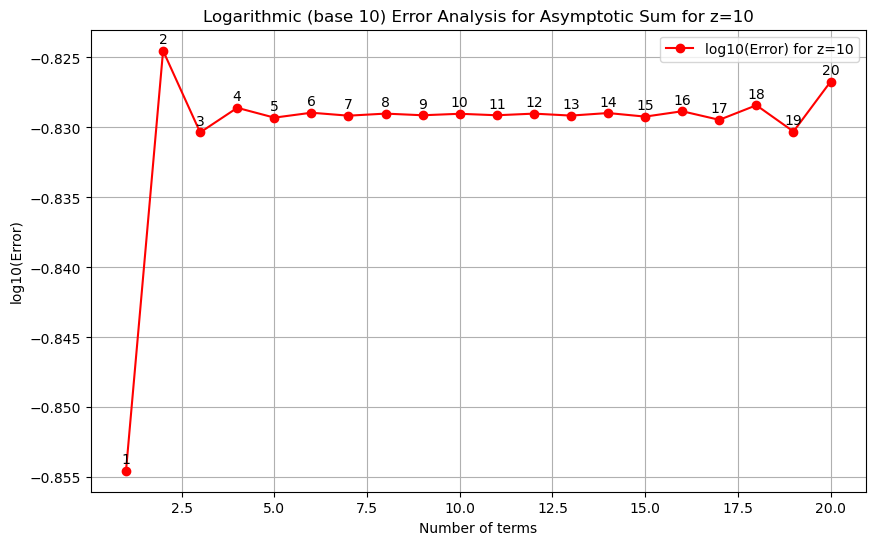

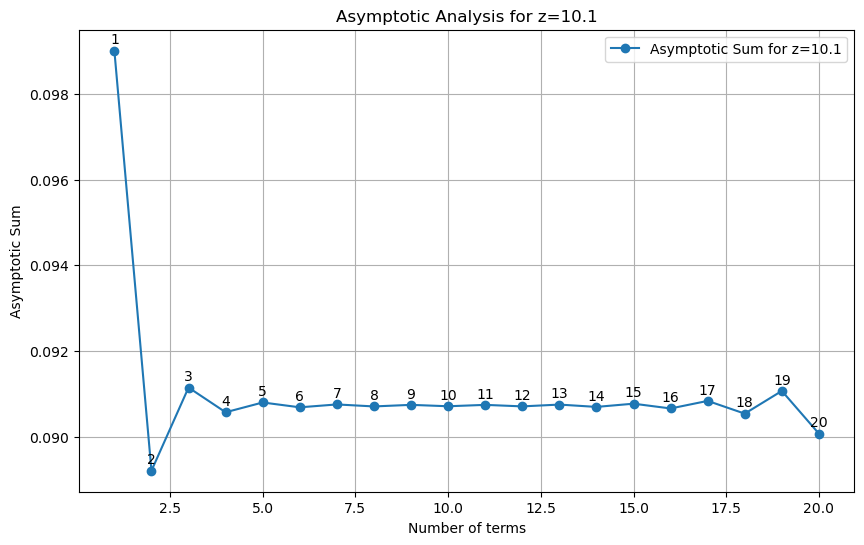

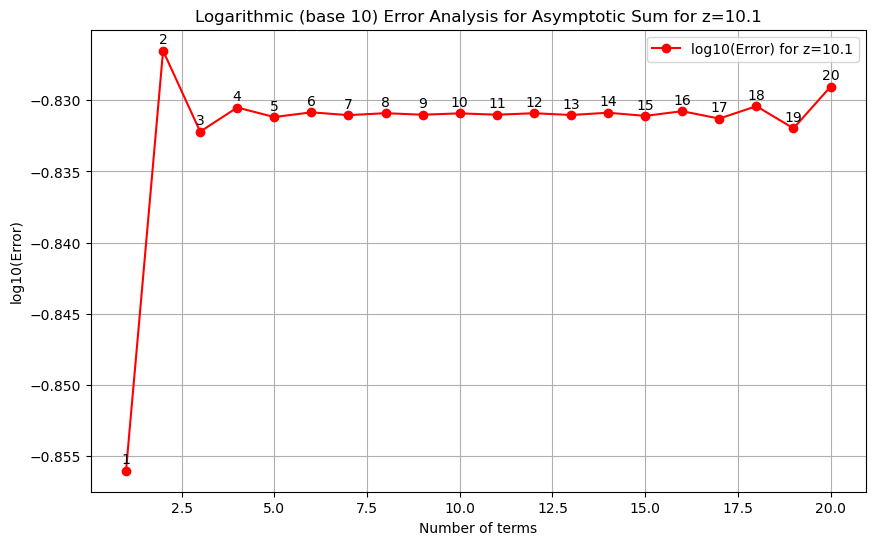

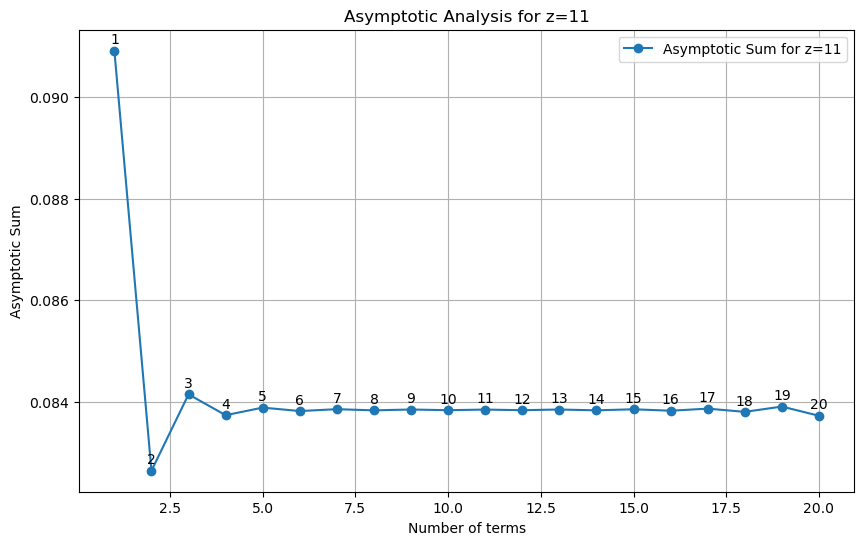

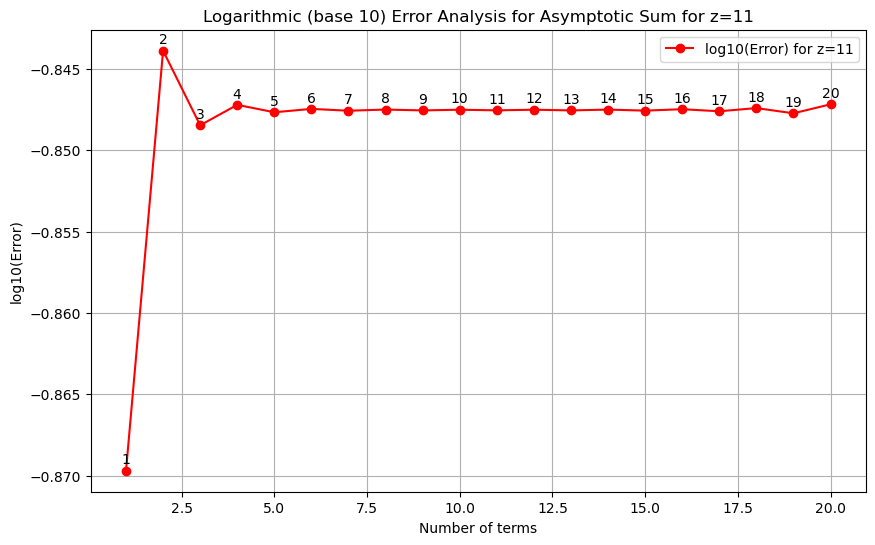

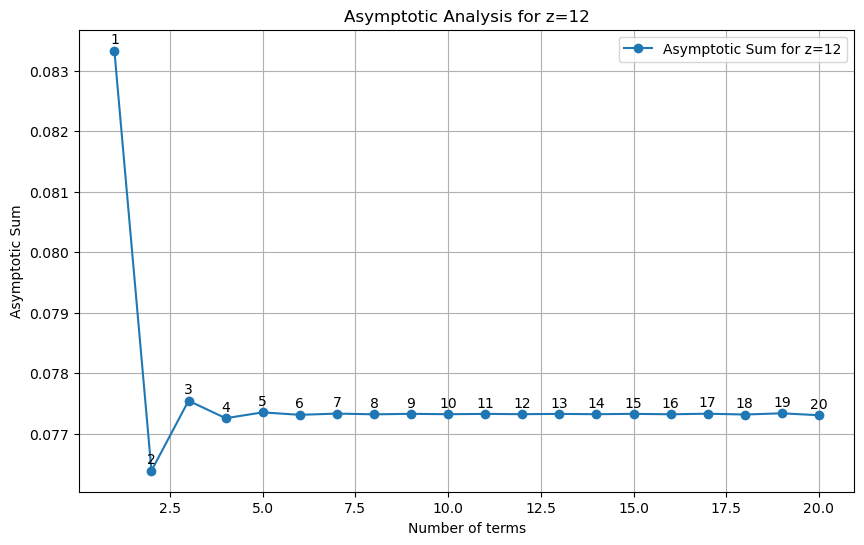

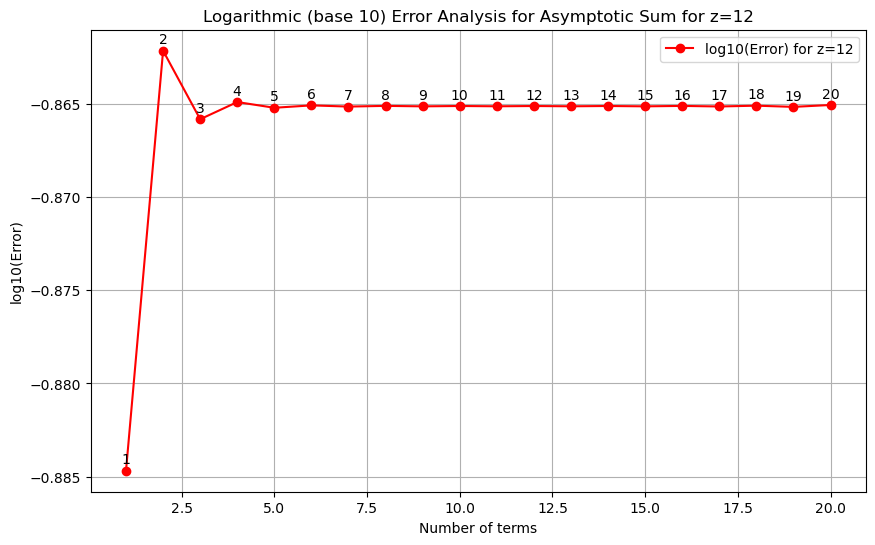

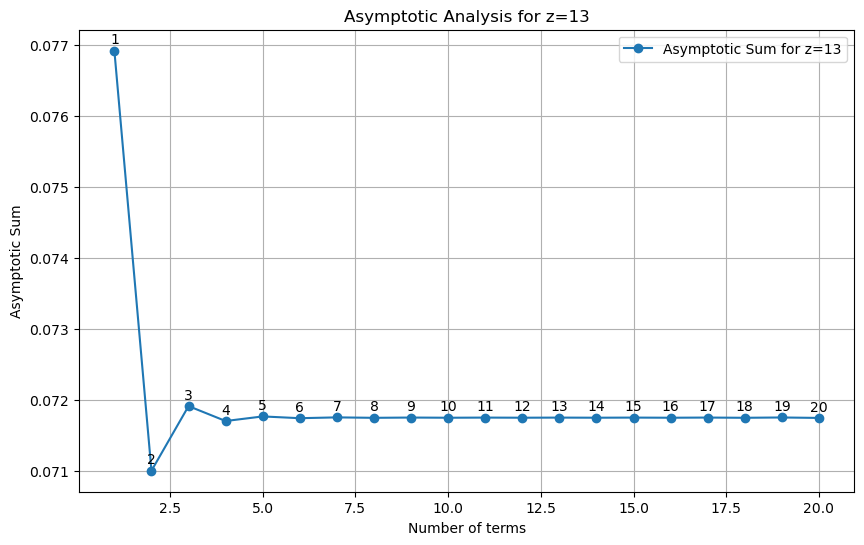

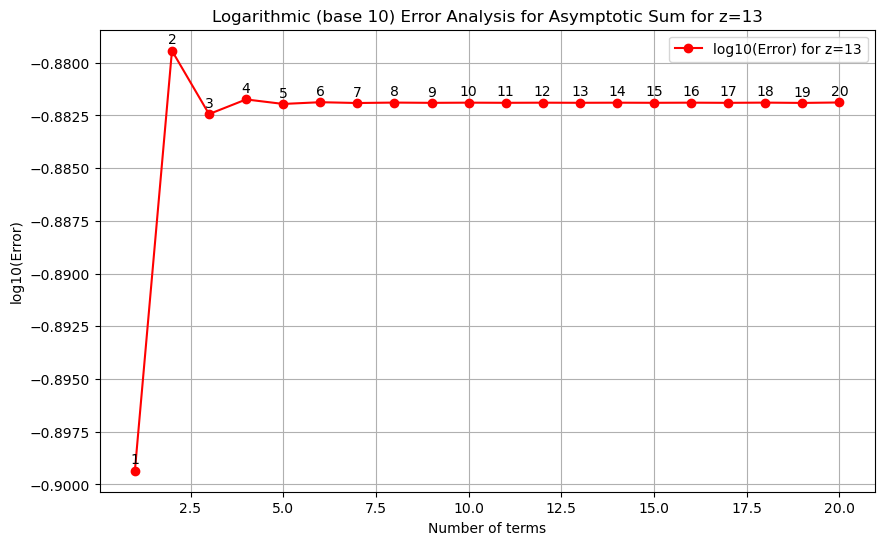

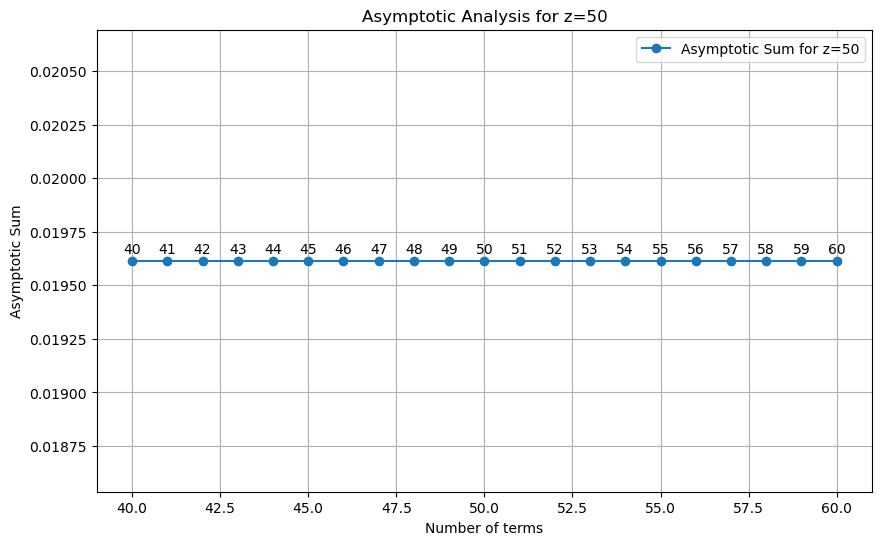

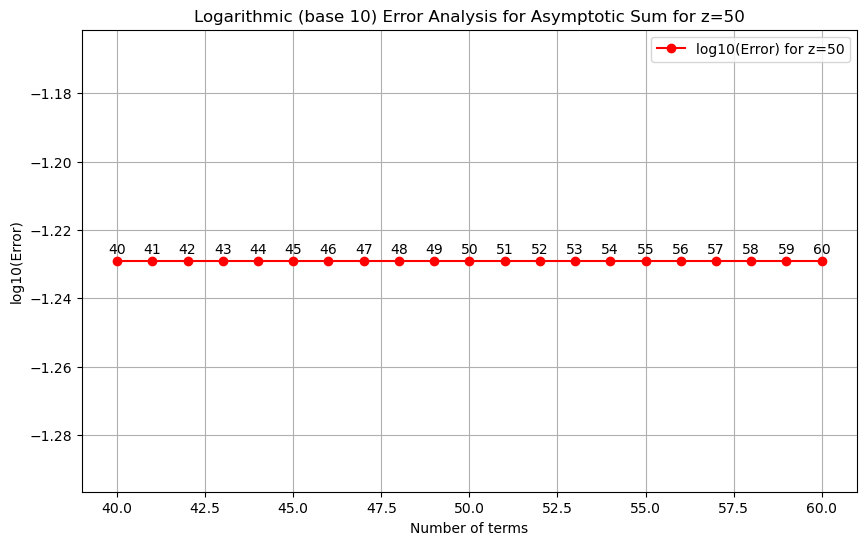

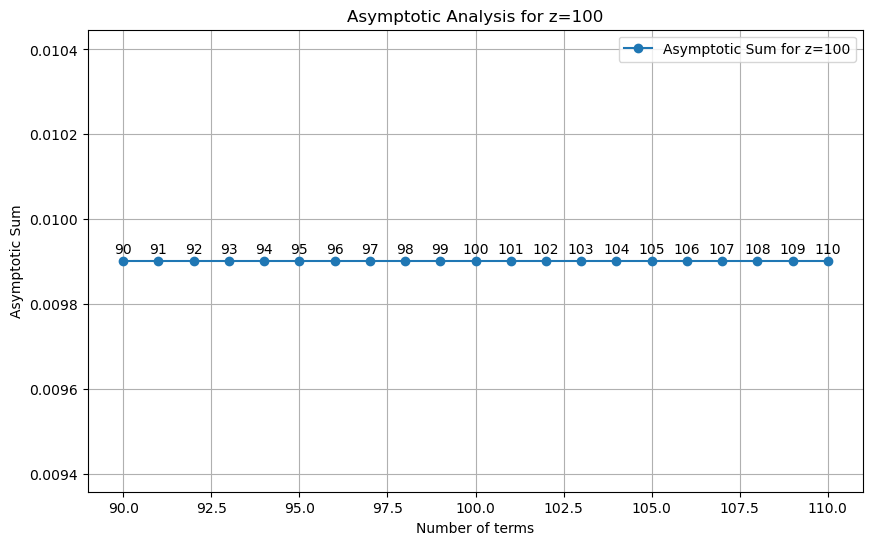

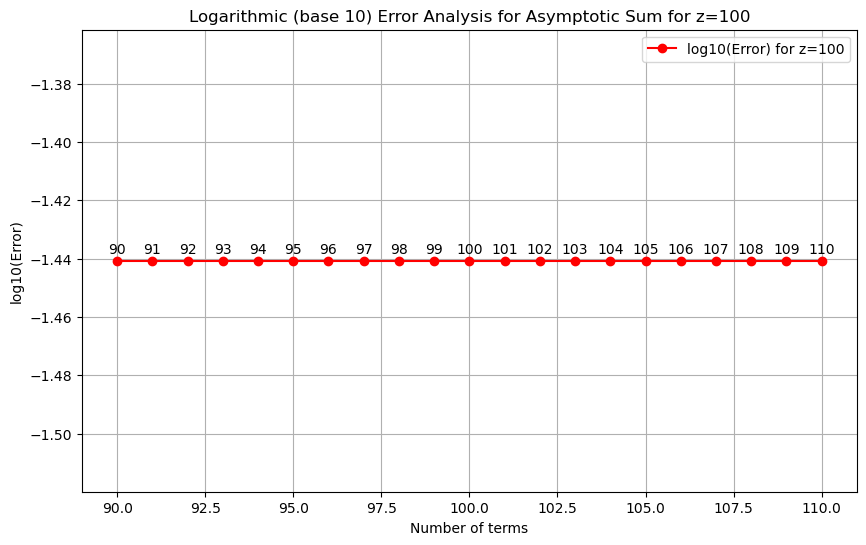

In [14]:
import math
import matplotlib.pyplot as plt

def asymptotic_sum(z, num_terms):
    sum_value = 0
    for n in range(num_terms):
        term = (-1)**n * math.factorial(n) / z**(n + 1)
        sum_value += term
    return sum_value

# 定义不同的 z 值及其对应的项数范围
z_values = [10, 10.10, 11, 12, 13, 50, 100]
terms_ranges = {
    10: range(1, 21),
    10.10: range(1, 21),
    11: range(1, 21),
    12: range(1, 21),
    13: range(1, 21),
    50: range(40, 61),
    100: range(90, 111)
}

# 存储所有结果
all_results = []

# 计算并打印结果
for z_value in z_values:
    terms = terms_ranges[z_value]
    results = []
    exact_value = math.log(1 + z_value) / z_value  # 精确值用于误差分析
    for num_terms in terms:
        result = asymptotic_sum(z_value, num_terms)
        error = abs(result - exact_value)  # 计算误差
        results.append((num_terms, result, error))
    
    all_results.append((z_value, results))
    
    # 打印结果
    print(f"Results for z = {z_value}:")
    for num_terms, result, error in results:
        print(f"  With {num_terms} terms: {result}, Error: {error}")
    print()

# 绘制结果图表和误差图表
for z_value, results in all_results:
    terms_list, results_list, errors_list = zip(*results)
    
    # 绘制结果图表
    plt.figure(figsize=(10, 6))
    plt.plot(terms_list, results_list, marker='o', label=f'Asymptotic Sum for z={z_value}')
    plt.xlabel('Number of terms')
    plt.ylabel('Asymptotic Sum')
    plt.title(f'Asymptotic Analysis for z={z_value}')
    plt.grid(True)

    # 标注每个点
    for num_terms, result in zip(terms_list, results_list):
        plt.annotate(f'{num_terms}', (num_terms, result), textcoords="offset points", xytext=(0,5), ha='center')

    plt.legend()
    plt.show()

    # 绘制误差图表 (log10 变换)
    log10_errors_list = [math.log10(error) for error in errors_list]
    plt.figure(figsize=(10, 6))
    plt.plot(terms_list, log10_errors_list, marker='o', color='red', label=f'log10(Error) for z={z_value}')
    plt.xlabel('Number of terms')
    plt.ylabel('log10(Error)')
    plt.title(f'Logarithmic (base 10) Error Analysis for Asymptotic Sum for z={z_value}')
    plt.grid(True)

    # 标注每个点
    for num_terms, log10_error in zip(terms_list, log10_errors_list):
        plt.annotate(f'{num_terms}', (num_terms, log10_error), textcoords="offset points", xytext=(0,5), ha='center')

    plt.legend()
    plt.show()


## The analysis for size of reminders on level 0 

渐进性的余项大小分析

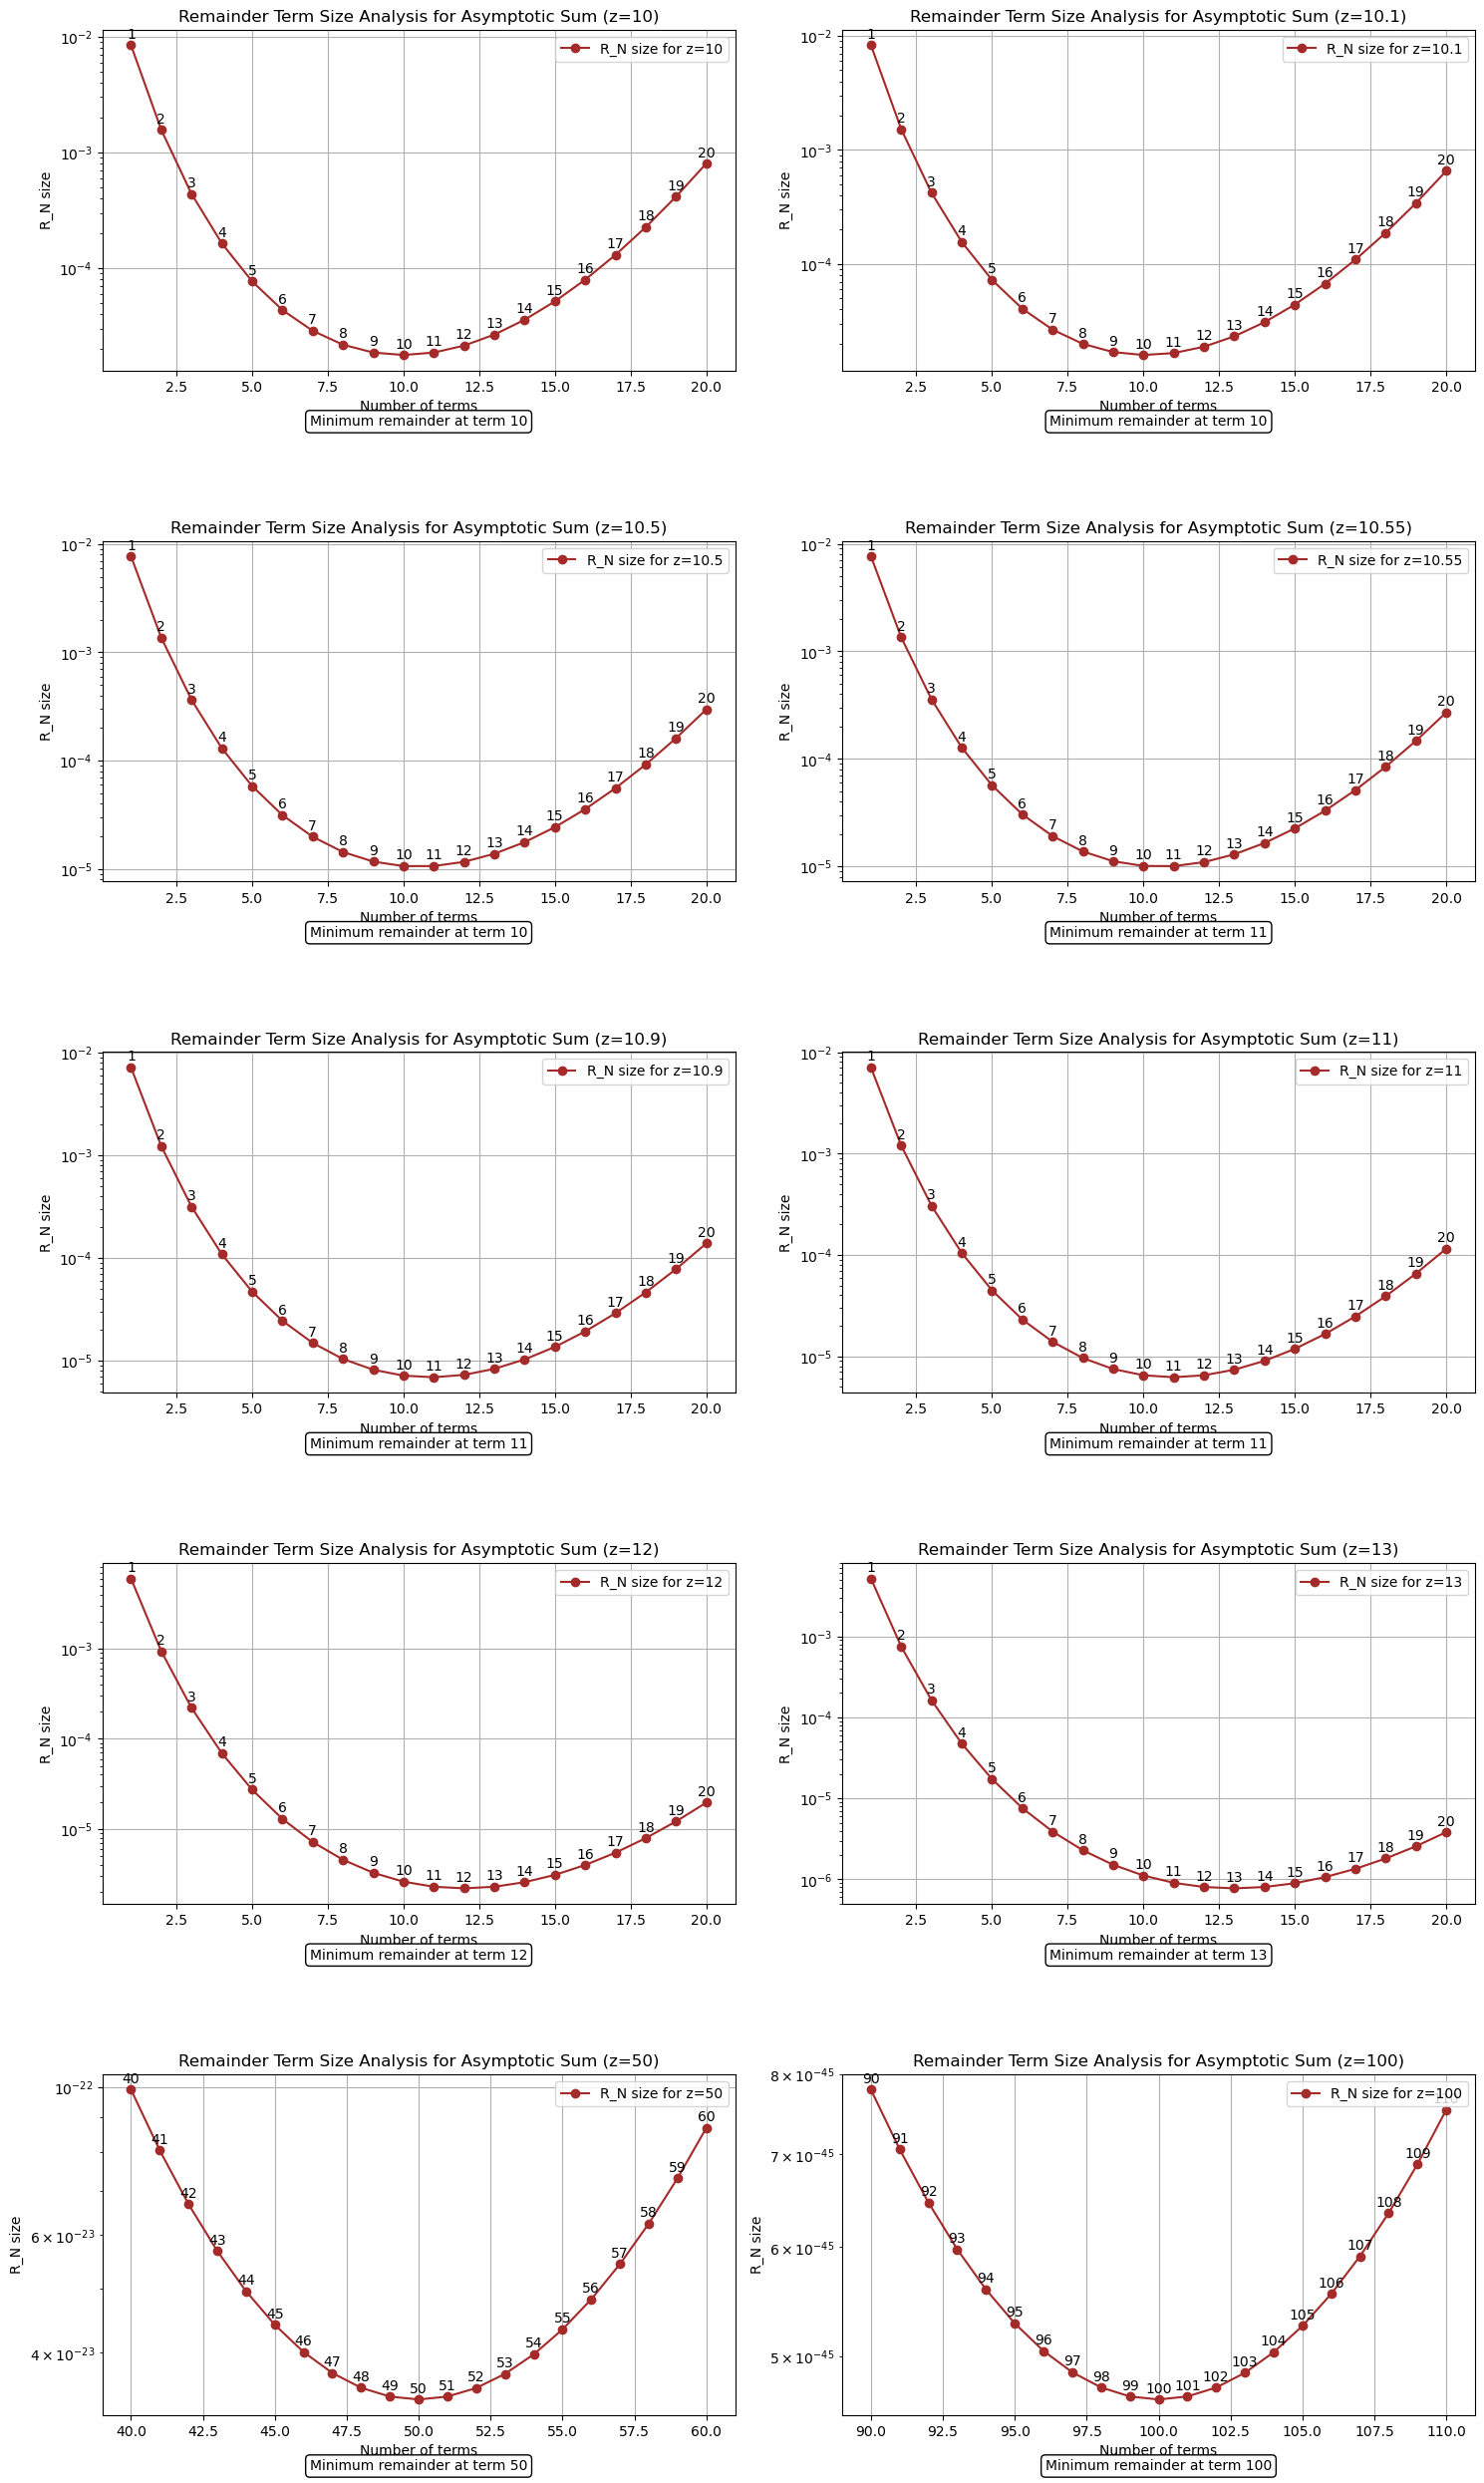

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def asymptotic_sum(z, num_terms):
    sum_value = 0
    for n in range(num_terms):
        term = (-1)**n * math.factorial(n) / z**(n + 1)
        sum_value += term
    return sum_value

def remainder_term(z, N):
    integrand = lambda t: (np.exp(-z * t) * t**N) / (1 + t)
    R_N, _ = quad(integrand, 0, np.inf)
    return (-1)**N * R_N

z_values = [10, 10.10, 10.50, 10.55, 10.90, 11, 12, 13, 50, 100]
terms_ranges = {
    10: range(1, 21),
    10.10: range(1, 21),
    10.50: range(1, 21),
    10.55: range(1, 21),
    10.90: range(1, 21),
    11: range(1, 21),
    12: range(1, 21),
    13: range(1, 21),
    50: range(40, 61),
    100: range(90, 111)
}

# z_values = [10, 10.10, 10.50, 10.55, 10.90, 11, 12, 13, 30, 100]
# terms_ranges = {
#     10: range(1, 21),
#     10.10: range(1, 21),
#     10.50: range(1, 21),
#     10.55: range(1, 21),
#     10.90: range(1, 21),
#     11: range(1, 21),
#     12: range(1, 21),
#     13: range(1, 21),
#     30: range(1, 50),
#     100: range(90, 111)
# }


# Set up subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()  # Flatten the array of subplots for easier indexing

for idx, z_value in enumerate(z_values):
    terms = terms_ranges[z_value]
    remainder_results = []
    
    for num_terms in terms:
        R_N_value = remainder_term(z_value, num_terms)
        remainder_results.append((num_terms, abs(R_N_value)))
    
    terms_list, remainder_sizes = zip(*remainder_results)
    
    # Find the term with the minimum remainder
    min_remainder_term = terms_list[np.argmin(remainder_sizes)]
    min_remainder_value = min(remainder_sizes)
    
    # Plot the remainder size for each z value
    axes[idx].plot(terms_list, remainder_sizes, marker='o', color='brown', label=f'R_N size for z={z_value}')
    axes[idx].set_xlabel('Number of terms')
    axes[idx].set_ylabel('R_N size')
    axes[idx].set_title(f'Remainder Term Size Analysis for Asymptotic Sum (z={z_value})')
    axes[idx].set_yscale('log')  # Use logarithmic scale for better visualization
    axes[idx].grid(True)
    
    # Add annotation showing the term with the minimum remainder
    axes[idx].annotate(f'Minimum remainder at term {min_remainder_term}', 
                       xy=(0.5, -0.15), xycoords='axes fraction', 
                       ha='center', va='center', fontsize=10, 
                       bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    
    # Annotate each point
    for num_terms, remainder_size in zip(terms_list, remainder_sizes):
        axes[idx].annotate(f'{num_terms}', (num_terms, remainder_size), textcoords="offset points", xytext=(0,5), ha='center')
    
    axes[idx].legend()

# Remove unused subplots
for i in range(len(z_values), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

p[0] := 1/2*N!/z^(N+1)
p[1] := 1/4*N!/z^(N+1) - 1/4*(N+1)!/z^(N+2)
for m from 1 to 50 do p[m+1] := 1/2/z*((z-N-m-1)*p[m] + m/2*p[m-1]) od:

f - app[N-1];
add(p[j], j = 0..39);
%%-%;

plot1 := plot([[j, ln(abs(j!/z^(j+1)))/ln(10)] $j=0..35],style=point, colour=red)
plot1 := plot([[j+N, ln(abs(p[j]))/ln(10)] $j=0..50],style=point, colour=blue)
display({plot1,plot2})


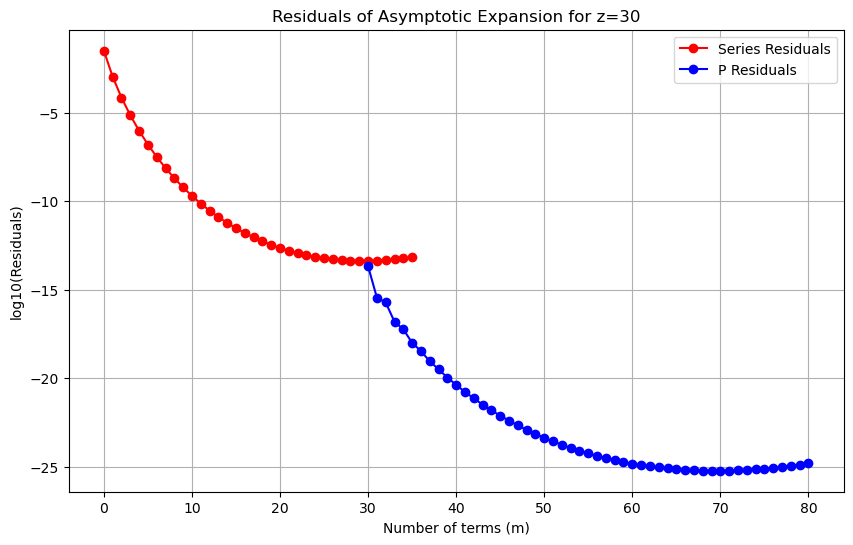

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 定义 p[0] 和 p[1]
def P_0(z, N):
    return 1/2 * math.factorial(N) / z**(N + 1)

def P_1(z, N):
    return 1/4 * math.factorial(N) / z**(N + 1) - 1/4 * math.factorial(N + 1) / z**(N + 2)

# 递推关系计算 p[m]
def P_m_recurrent(z, m, N, P_prev, P_prev_prev):
    return ((z - m - N - 1) * P_prev + 1/2 * m * P_prev_prev) / (2 * z)

# 参数
z = 30
N = 30 # 假设 N = z

# 初始化数组存储结果
M_max = 50
P_values = np.zeros(M_max + 1)

# 计算 p[0] 和 p[1]
P_values[0] = P_0(z, N)
P_values[1] = P_1(z, N)

# 递推关系计算 p[m]
for m in range(1, M_max):
    P_values[m + 1] = P_m_recurrent(z, m, N, P_values[m], P_values[m - 1])

# 计算级数项的对数残差
series_residuals = [np.log10(abs(math.factorial(j) / z**(j + 1))) for j in range(36)]
P_residuals = [np.log10(abs(P_values[j])) for j in range(51)]

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(range(36), series_residuals, 'ro-', label='Series Residuals')
plt.plot(range(N, N + 51), P_residuals, 'bo-', label='P Residuals')

plt.xlabel('Number of terms (m)')
plt.ylabel('log10(Residuals)')
plt.title('Residuals of Asymptotic Expansion for z=30')
plt.grid(True)
plt.legend()
plt.show()


In [2]:
print(P_values[0], P_values[1])

2.1471934958507848e-14 -3.578655826417962e-16


In [10]:
def integrand(t, z):
    return np.exp(-z * t) / (1 + t)

z_values = 10
integrand()

3.381887250928033e-45


calculate complex integral

real function level 2

第二部分code复现一下